In [1]:
import pandas as pd
import datetime
import missingno
import os

<b>Load Data and Join Initial Datasets, Clean as Needed</b>

In [2]:
#enter your appriate path/paths here
path = 'C:/Users/heath/Desktop/W207/w207_final_project/data/'

In [3]:
tweets = pd.read_csv(path+'Tweet.csv')

In [4]:
company_tweets = pd.read_csv(path +'Company_Tweet.csv')

In [5]:
company = pd.read_csv(path +'Company.csv')

In [6]:
tweet_combo = pd.merge(tweets, company_tweets)

In [7]:
tweet_combo = pd.merge(tweet_combo, company)

In [8]:
companynasdaq = pd.read_csv(path + 'Company_nasdaq.csv')

In [9]:
company_val = pd.read_csv(path+'CompanyValues.csv')

In [10]:
company_val.day_date = pd.to_datetime(company_val.day_date,format='%Y-%m-%d')

In [11]:
#get stock data 2015 plus to match our tweet data dates
company_val = company_val.loc[company_val.day_date >= '2015-01-01']

In [12]:
#check to make sure filter worked
company_val.day_date.min()

Timestamp('2015-01-01 00:00:00')

In [13]:
stock_prices = pd.merge(company_val, companynasdaq)

In [14]:
tweet_combo.post_date = tweet_combo.post_date.apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
tweet_combo.post_date = pd.to_datetime(tweet_combo.post_date, format='%Y-%m-%d')

In [15]:
len(tweet_combo)

4336445

In [16]:
#join on date and ticker symbol to get the stock price for the company for the date of the post

In [17]:
final_df = pd.merge(tweet_combo, stock_prices, left_on = ['post_date', 'ticker_symbol'], right_on = ['day_date', 'ticker_symbol'])

In [18]:
#lost x amount of tweets when merging stock data (171)

In [19]:
len(tweet_combo) - len(final_df)

171

In [20]:
final_df = final_df.rename(columns = {'company_name_x': 'company_name'})
final_df = final_df.drop(['company_name_y'], axis=1)

<b>Export to appropriate path here</b>

In [21]:
final_df.to_csv(path+'cleaned_data.csv')

<b>Data Exploration ..</b>

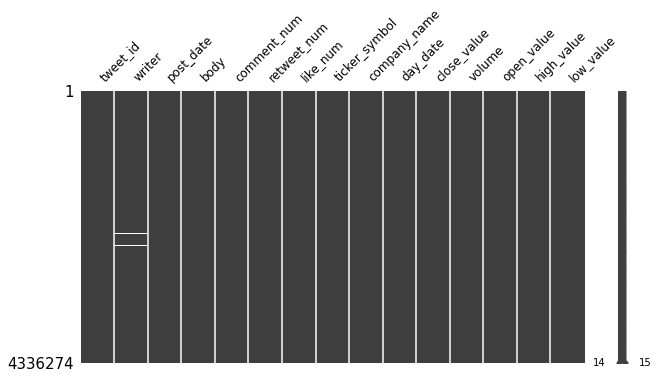

In [22]:
missingno.matrix(final_df,figsize=(10,5), fontsize=12)

In [23]:
#cool that we are actually not missing a lot of data, basically have full data for all values.


In [24]:
final_df.describe()

,tweet_id,comment_num,retweet_num,like_num,close_value,volume,open_value,high_value,low_value
count,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06,4.336274e+06
mean,8.834413e+17,2.923867e-01,6.347207e-01,2.103661e+00,4.595990e+02,2.005131e+07,4.596834e+02,4.646605e+02,4.541944e+02
std,1.927660e+17,1.885780e+00,6.985978e+00,1.371765e+01,4.634337e+02,2.224596e+07,4.636247e+02,4.678384e+02,4.586462e+02
min,5.505179e+17,0.000000e+00,0.000000e+00,0.000000e+00,4.029000e+01,3.475180e+05,4.034000e+01,4.074000e+01,3.972000e+01
25%,7.185662e+17,0.000000e+00,0.000000e+00,0.000000e+00,1.289500e+02,3.742816e+06,1.290800e+02,1.304900e+02,1.282400e+02
50%,8.825983e+17,0.000000e+00,0.000000e+00,0.000000e+00,2.574800e+02,1.021294e+07,2.573500e+02,2.619900e+02,2.521000e+02
75%,1.054777e+18,0.000000e+00,0.000000e+00,1.000000e+00,7.017900e+02,3.034878e+07,7.010500e+02,7.080912e+02,6.940000e+02
max,1.212160e+18,6.310000e+02,9.990000e+02,9.990000e+02,2.039510e+03,1.691150e+08,2.038110e+03,2.050500e+03,2.013000e+03


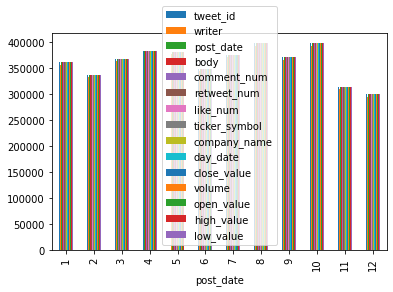

In [25]:
final_df.groupby(final_df["post_date"].dt.month).count().plot(kind="bar")